In [1]:
import os
import lenspyx
from lenspyx.utils import camb_clfile
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import pymaster as nmt
import pickle as pk
import emcee
import corner

In [2]:
cl_len = camb_clfile('/project/projectdirs/litebird/simulations/S4BIRD/CAMB/s4bird_lensedCls.dat')
cl_unl = camb_clfile('/project/projectdirs/litebird/simulations/S4BIRD/CAMB/s4bird_lenspotentialCls.dat')
ini = '/project/projectdirs/litebird/simulations/S4BIRD/CAMB/CAMB.ini'

In [3]:
import sys
sys.path.append('/global/u2/l/lonappan/workspace/s4bird/s4bird/validations_dir')
from noise import noise_realisation
sys.path.append('../../')
from likelihood import cosmology

In [4]:
lmax = 4096
dlmax = 1024
nside = 2048 
facres = -1

In [5]:
plm = hp.synalm(cl_unl['pp'], lmax=lmax + dlmax, new=True)

In [6]:
dlm = hp.almxfl(plm, np.sqrt(np.arange(lmax + 1, dtype=float) * np.arange(1, lmax + 2)))

In [7]:
elm_unl = hp.synalm(cl_unl['ee'], lmax=lmax + dlmax, new=True)
Qlen, Ulen  = lenspyx.alm2lenmap_spin([elm_unl, None], [dlm, None], nside, 2, facres=facres)
elm_len, blm_len = hp.map2alm_spin([Qlen, Ulen], 2, lmax=lmax)

BAND 0 in 8 :
resolve_poles: I have flipped 3 signs out of 6 pixels on north pole
resolve_poles: I have flipped 0 signs out of 2 pixels on south pole
input t1,t2 -0.296 11.641 in degrees
North 18.661 and South 18.701 buffers in amin
cell (theta,phi) in amin (1.870,1.064)
BAND 1 in 8 :
input t1,t2 10.859 22.917 in degrees
North 18.879 and South 18.865 buffers in amin
cell (theta,phi) in amin (1.889,1.027)
BAND 2 in 8 :
input t1,t2 22.106 34.187 in degrees
North 18.863 and South 18.910 buffers in amin
cell (theta,phi) in amin (1.893,1.482)
BAND 3 in 8 :
input t1,t2 33.353 45.400 in degrees
North 18.872 and South 18.835 buffers in amin
cell (theta,phi) in amin (1.887,0.939)
BAND 4 in 8 :
input t1,t2 44.571 56.659 in degrees
North 18.924 and South 18.903 buffers in amin
cell (theta,phi) in amin (1.894,1.101)
BAND 5 in 8 :
input t1,t2 55.841 67.913 in degrees
North 18.912 and South 18.909 buffers in amin
cell (theta,phi) in amin (1.891,1.222)
BAND 6 in 8 :
input t1,t2 67.070 79.172 in degre

/global/homes/l/lonappan/.conda/envs/PC/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


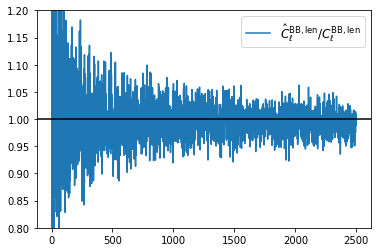

In [8]:
ell = np.arange(2500)
plt.figure()
plt.plot(ell, hp.alm2cl(blm_len)[ell] /cl_len['bb'][ell], label=r'$\hat C_\ell^{\rm BB, len}/ C_\ell^{\rm BB, len}$')
plt.axhline(1., c='k')
plt.ylim(0.8, 1.2)
plt.legend(fontsize=12)

In [9]:
Qtemp, Utemp  = lenspyx.alm2lenmap_spin([elm_len, None], [dlm, None], nside, 2, facres=facres)
elm_del, blm_del = hp.map2alm_spin([Qlen-Qtemp, Ulen-Utemp], 2, lmax=lmax)

BAND 0 in 8 :
resolve_poles: I have flipped 3 signs out of 6 pixels on north pole
resolve_poles: I have flipped 0 signs out of 2 pixels on south pole
input t1,t2 -0.296 11.641 in degrees
North 18.661 and South 18.701 buffers in amin
cell (theta,phi) in amin (1.870,1.064)
BAND 1 in 8 :
input t1,t2 10.859 22.917 in degrees
North 18.879 and South 18.865 buffers in amin
cell (theta,phi) in amin (1.889,1.027)
BAND 2 in 8 :
input t1,t2 22.106 34.187 in degrees
North 18.863 and South 18.910 buffers in amin
cell (theta,phi) in amin (1.893,1.482)
BAND 3 in 8 :
input t1,t2 33.353 45.400 in degrees
North 18.872 and South 18.835 buffers in amin
cell (theta,phi) in amin (1.887,0.939)
BAND 4 in 8 :
input t1,t2 44.571 56.659 in degrees
North 18.924 and South 18.903 buffers in amin
cell (theta,phi) in amin (1.894,1.101)
BAND 5 in 8 :
input t1,t2 55.841 67.913 in degrees
North 18.912 and South 18.909 buffers in amin
cell (theta,phi) in amin (1.891,1.222)
BAND 6 in 8 :
input t1,t2 67.070 79.172 in degre

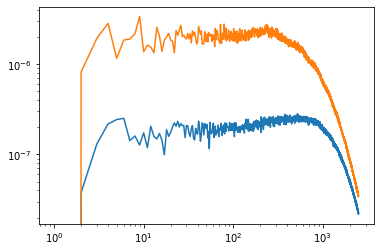

In [10]:
plt.loglog(hp.alm2cl(blm_del)[ell])
plt.loglog(hp.alm2cl(blm_len)[ell])

In [6]:
wk = nmt.NmtWorkspace()

In [7]:
mask = hp.read_map('/global/u2/l/lonappan/workspace/S4bird/Data/masks/cmbs4_512_apo_C1_10.fits.gz')

/global/homes/l/lonappan/.conda/envs/PC/lib/python3.6/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/global/homes/l/lonappan/.conda/envs/PC/lib/python3.6/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 512
  warnings.warn("NSIDE = {0:d}".format(nside))
/global/homes/l/lonappan/.conda/envs/PC/lib/python3.6/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/global/homes/l/lonappan/.conda/envs/PC/lib/python3.6/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [13]:
noise = noise_realisation(nside,1.5,2.15,0)

In [14]:
Qdel = hp.smoothing(Qlen-Qtemp, np.radians(.5)) + noise[1]
Udel = hp.smoothing(Ulen-Utemp, np.radians(.5)) + noise[2]
f2  = nmt.NmtField(mask, [hp.ud_grade(Qdel,512), hp.ud_grade(Udel,512)],purify_b=True)

/global/homes/l/lonappan/.conda/envs/PC/lib/python3.6/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 12.739827 arcmin (0.003706 rad) 
  sigma * 60 * 180 / np.pi, sigma
/global/homes/l/lonappan/.conda/envs/PC/lib/python3.6/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 30.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))
/global/homes/l/lonappan/.conda/envs/PC/lib/python3.6/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  sigma * 60 * 180 / np.pi, sigma
/global/homes/l/lonappan/.conda/envs/PC/lib/python3.6/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 0.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


In [18]:
b = nmt.NmtBin.from_nside_linear(512, 10)

In [19]:
wk.compute_coupling_matrix(f2, f2, b)

NameError: name 'f2' is not defined

In [20]:
cw = nmt.NmtCovarianceWorkspace()

In [18]:
cw.compute_coupling_coefficients(f2, f2, f2, f2)

In [19]:
def compute_master(f_a, f_b, wsp):
    cl_coupled = nmt.compute_coupled_cell(f_a, f_b)
    cl_decoupled = wsp.decouple_cell(cl_coupled)
    return cl_decoupled

In [20]:
cl_22 = compute_master(f2,f2,wk)

In [21]:
n_ell = len(cl_22[0])

In [22]:
cl_ee = cl_len['ee'][:b.lmax+1]
cl_eb = 0*cl_ee
cl_bb = cl_len['bb'][:b.lmax+1]


covar_22_22 = nmt.gaussian_covariance(cw, 2, 2, 2, 2,  # Spins of the 4 fields
                                      [cl_ee, cl_eb,
                                       cl_eb, cl_bb],  # EE, EB, BE, BB
                                      [cl_ee, cl_eb,
                                       cl_eb, cl_bb],  # EE, EB, BE, BB
                                      [cl_ee, cl_eb,
                                       cl_eb, cl_bb],  # EE, EB, BE, BB
                                      [cl_ee, cl_eb,
                                       cl_eb, cl_bb],  # EE, EB, BE, BB
                                      wk, wb=wk).reshape([n_ell, 4,
                                                            n_ell, 4])

In [8]:
covar_BB_BB = pk.load(open('cov_del_r_s4.pkl','rb'))#covar_22_22[:, 3, :, 3]

In [9]:
#pk.dump(covar_BB_BB,open('cov_del.pkl','wb'))

In [10]:
cov_inv = np.linalg.inv(covar_BB_BB)

In [11]:
cov_inv

array([[1.43978050e+14, 4.06939277e+14, 6.24735769e+14, ...,
        1.44822420e+14, 1.43562623e+14, 1.45201867e+14],
       [4.06939277e+14, 1.16518765e+15, 1.76829519e+15, ...,
        4.09160268e+14, 4.05601749e+14, 4.10178917e+14],
       [6.24735769e+14, 1.76829519e+15, 2.73392002e+15, ...,
        6.28421165e+14, 6.22947550e+14, 6.30047675e+14],
       ...,
       [1.44822420e+14, 4.09160268e+14, 6.28421165e+14, ...,
        8.21153616e+16, 6.91807885e+15, 5.25358350e+14],
       [1.43562623e+14, 4.05601749e+14, 6.22947550e+14, ...,
        6.91807885e+15, 8.64136386e+16, 7.27709001e+15],
       [1.45201867e+14, 4.10178917e+14, 6.30047675e+14, ...,
        5.25358350e+14, 7.27709001e+15, 9.10240585e+16]])

In [12]:
import pickle as pl

In [13]:
lb_spectra = pl.load(open('lb_spectra.pkl','rb'))

In [14]:
len_m,len_s,del_m,del_s = lb_spectra

NameError: name 'cl_22' is not defined

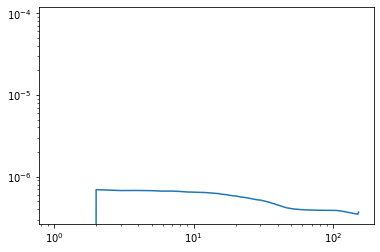

In [21]:
plt.loglog(del_m, label='Experiment')
plt.loglog(cl_22[3], label='Computed')
plt.axhline(np.radians(2.15/60)**2)
plt.legend()

In [22]:
lmin = 30
lmax = 180

In [23]:
ell_e = b.get_effective_ells()
sel  = np.where((ell_e < lmax) & (ell_e >lmin))[0]

In [24]:
imin = sel[0]
imax = sel[-1]+1

In [25]:
len(sel)

15

In [26]:
covar_BB_BB[imin:imax,imin:imax].shape

(15, 15)

In [27]:
cos = cosmology('/global/u2/l/lonappan/workspace/S4bird/Notebooks/Likelihood/Test/',2048,10,ini,True)

In [28]:
bb_lensing = cos.get_BB('S',r=0)

returning cache


In [29]:
bb_tensor = cos.get_BB('T',1)

returning cache


/global/homes/l/lonappan/.conda/envs/PC/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


(1e-06, 3.469023500264554e-06)

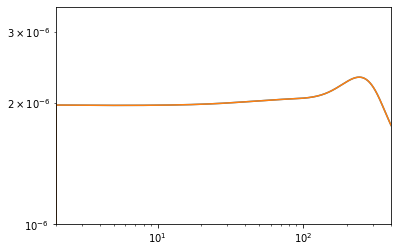

In [30]:
ell = np.arange(len(bb_lensing))
dl = ell*(ell+1)/(2*np.pi)
plt.loglog(bb_lensing/dl)
plt.loglog(cl_len['bb'])
plt.xlim(2,400)
plt.ylim(10**-6,None)

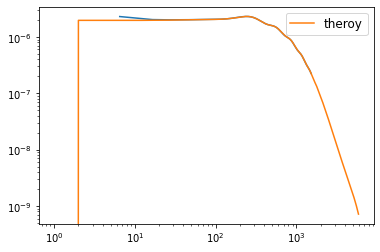

In [31]:
dl = ell_e*(ell_e+1)/(2*np.pi)
dl2 = ell*(ell+1)/(2*np.pi)
plt.loglog(ell_e,b.bin_cell(bb_lensing[:b.lmax+1])/dl)
plt.loglog(ell, cl_len['bb'][ell], label='theroy')
#pl.loglog(ell,cos.get_BB('S')[ell]/dl2, label='theory gene')
plt.legend(fontsize=12)

In [82]:
bb_lens = b.bin_cell(bb_lensing[:b.lmax+1])
bb_tens = b.bin_cell(bb_tensor[:b.lmax+1])
fid = pk.load(open('c_fid_s4.pkl','rb'))[sel]#cl_22[3][sel]
cov_inv_fid = cov_inv[imin:imax,imin:imax]

dl = ell_e*(ell_e+1)/(2*np.pi)
#cl_data = b.bin_cell(cl_len['bb'][:b.lmax+1])[sel]* dl[sel]
#cl_data = b.bin_cell(cos.get_BB('S')[:b.lmax+1])[sel]

In [83]:
import pickle as pk
lb_spectra = pk.load(open('lb_spectra.pkl','rb'))
lb_s4_spectra = pk.load(open('lb_s4_spectra.pkl','rb'))
lb_s4plb_spectra = pk.load(open('lb_s4plb_spectra.pkl','rb'))
lb_bias = pk.load(open('lb_bias.pkl','rb'))
lb_s4_bias = pk.load(open('lb_s4_bias.pkl','rb'))
lb_s4plb_bias = pk.load(open('lb_s4plb_bias.pkl','rb'))
len_m,len_s,del_m,del_s = lb_spectra
len_m_s,len_s_s,del_m_s,del_s_s = lb_s4_spectra
len_m_spl,len_s_spl,del_m_spl,del_s_spl = lb_s4plb_spectra


#cl_data = (del_m[sel]-lb_bias[sel])*dl[sel]
cl_data = (del_m_s[sel]-lb_s4_bias[sel])*dl[sel]
#cl_data = (del_m_spl[sel]-lb_s4plb_bias[sel])*dl[sel]

In [84]:
bl = cos.get_beam(30)

In [85]:
def X(cl_obs,cl_theo):
    return cl_obs/cl_theo

def theory(r,alens):
    return (r*bb_tens[sel] + alens*bb_lens[sel])*bl[sel]**2 + (np.ones(len(sel))*np.radians(2.15/60)**2 * dl[sel])
def G(cl_obs,cl_theo):
    x = X(cl_obs,cl_theo)
    return np.sign(x-1)* np.sqrt(2*(x - np.log(x) - 1))
def vect(theta):
    r,alens = theta
    cl_th = theory(r,alens)
    g = G(cl_data,cl_th)
    return g*fid
def lh(theta):
    vec = vect(theta)
    l = np.dot(np.dot(vec,cov_inv_fid),vec)
    return  l

In [86]:
np.radians(2.15/60)**2

3.91137228601128e-07

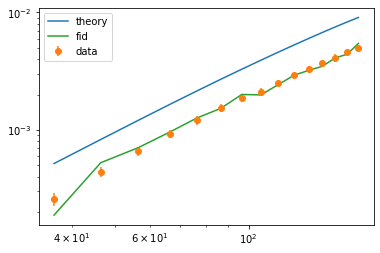

In [87]:
plt.loglog(ell_e[sel],theory(0,1),label='theory')
plt.errorbar(ell_e[sel],cl_data,yerr=len_s[sel]*dl[sel],fmt='o',label='data')
plt.loglog(ell_e[sel], fid*dl[sel],label='fid')
plt.legend()

In [88]:
def log_prior(theta):
    r,alens = theta
    if  -0.5 < r < 0.5 and 0 < alens <1.5:
        return 0.0
    return -np.inf

def log_probability(theta):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp  -.5 * lh(theta)

In [89]:
nsamples = 10000
pos = np.array([0.0,.45]) + 1e-4 * np.random.randn(100, 2)
nwalkers, ndim = pos.shape
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability)
sampler.run_mcmc(pos, nsamples,progress=True)

100%|██████████| 10000/10000 [00:53<00:00, 186.43it/s]


State([[-6.90917888e-04  4.63668982e-01]
 [-1.69687531e-04  4.42452384e-01]
 [-5.66021870e-04  4.64677735e-01]
 [ 3.94676373e-06  4.37021498e-01]
 [-8.98607658e-04  4.75820018e-01]
 [-1.40278439e-03  5.02803804e-01]
 [ 2.05564191e-04  4.23059900e-01]
 [-4.93074923e-04  4.61306606e-01]
 [-1.30949601e-04  4.43431898e-01]
 [ 2.57605310e-04  4.22730690e-01]
 [-2.23147431e-04  4.49786280e-01]
 [ 8.21963285e-06  4.37640761e-01]
 [-4.83244411e-04  4.64508913e-01]
 [-3.99770195e-04  4.59725037e-01]
 [-1.07492068e-03  4.88727570e-01]
 [-6.57732686e-04  4.68862009e-01]
 [ 8.38431292e-04  3.90128047e-01]
 [-6.51787591e-04  4.72894440e-01]
 [-2.19738104e-04  4.46473762e-01]
 [-4.60052882e-04  4.57365993e-01]
 [-2.19657458e-04  4.46787990e-01]
 [-6.18988395e-05  4.33467709e-01]
 [-9.06528909e-04  4.76617456e-01]
 [ 2.29471527e-04  4.23102343e-01]
 [-4.79301735e-04  4.59104224e-01]
 [ 4.65138575e-04  4.10730296e-01]
 [-5.03239070e-04  4.64019099e-01]
 [-2.08377560e-05  4.43274106e-01]
 [-4.98689334e

In [90]:
flat_samples = sampler.get_chain(discard=1000, thin=20, flat=True)

<Figure size 576x576 with 0 Axes>

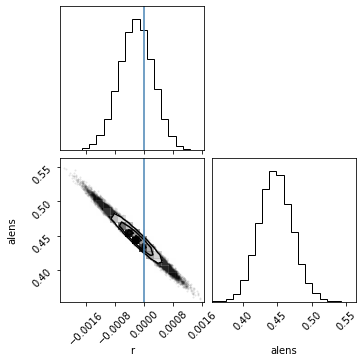

In [91]:
labels = ['r','alens']
plt.figure(figsize=(8,8))
fig = corner.corner(flat_samples, labels=labels,truths=[0,0])
#plt.savefig('delensed_emcee.png',bbox_inches='tight')

In [92]:
r_samp = np.sort(flat_samples[:,0])
r_pos = r_samp[r_samp>0]

In [93]:
print(f"{r_pos[int(len(r_pos)*.683)]:.2e}")

3.73e-04


In [43]:
def myLog(r,Alens):
    return log_probability([r,Alens])

info = {"likelihood": {"like": myLog}}

In [44]:
info["params"] = {
    "r": {"prior": {"min": -.5, "max": .5}, "ref": 0, "proposal": 0.01,"latex":"r"},
    "Alens": {"prior": {"min": 0, "max": 1.5}, "ref": 1, "proposal": 0.01,"latex":"A_{lens}"}}

In [45]:
info["sampler"] = {"mcmc": {"Rminus1_stop": 0.001, "max_tries": 1000}}

from cobaya.run import run
updated_info, sampler = run(info)

[like] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {like: 1950.0}
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: r:0, Alens:1
[mcmc] Sampling!
[mcmc] Progress @ 2021-09-11 03:58:13 : 1 steps taken, and 0 accepted.


/global/homes/l/lonappan/.conda/envs/PC/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
/global/homes/l/lonappan/.conda/envs/PC/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.009
[mcmc]  - Convergence of means: R-1 = 18.777909 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 0.024
[mcmc]  - Convergence of means: R-1 = 9.596673 after 128 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 240 samples accepted.
[mcmc]  - Acceptance rate: 0.050
[mcmc]  - Convergence of means: R-1 = 3.671837 after 192 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 320 samples accepted.
[mcmc]  - Acceptance rate: 0.088
[mcmc]  - Convergence of means: R-1 = 2.304764 after 256 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 400 samples accepted.
[mcmc]  - Acceptance rate: 0.249
[mcmc]  - Convergence of means: R-1 = 0.043665 after 320

[root] *WARNING* outlier fraction 0.00021645021645021645 


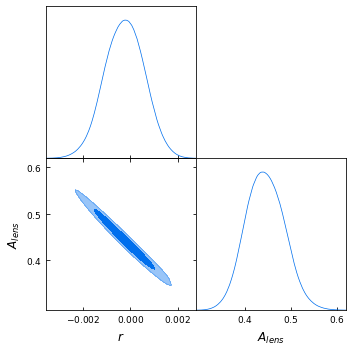

In [201]:
from getdist.mcsamples import MCSamplesFromCobaya
import getdist.plots as gdplt

gdsamples = MCSamplesFromCobaya(updated_info, sampler.products()["sample"],ignore_rows=100)
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples, ["r", "Alens"], filled=True)
plt.savefig('delensed_cobaya.png',bbox_inches='tight')

In [200]:
print(gdsamples.getLikeStats())

Best fit sample -log(Like) = 0.630060
Ln(mean 1/like) = 2.837554
mean(-Ln(like)) = 1.611358
-Ln(mean like)  = 1.316202

parameter    bestfit        lower1         upper1         lower2         upper2
r           -1.8905082E-04 -1.4714245E-03  1.0044273E-03 -2.3117865E-03  1.7148534E-03   r
Alens        4.4037373E-01  3.8294573E-01  5.0572044E-01  3.4763012E-01  5.4871650E-01   A_{lens}
chi2*        4.4918988E-01  4.4918988E-01  2.6518957E+00  4.4918988E-01  6.3396306E+00   \chi^2
chi2__like*  4.4918988E-01  4.4918988E-01  2.6518957E+00  4.4918988E-01  6.3396306E+00   \chi^2_\mathrm{like}



In [59]:
r = np.linspace(-.001,.001,100)

In [60]:
logp_ = [myLog(i,.847) for i in r]

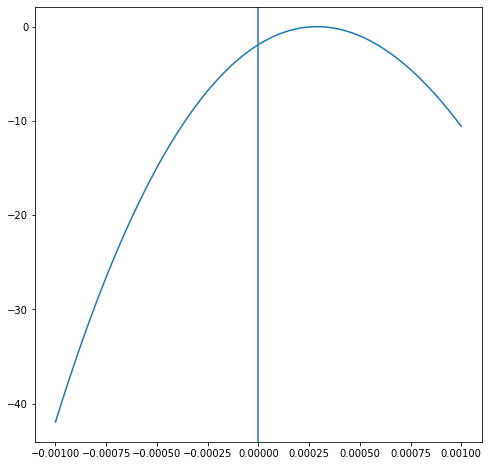

In [61]:
plt.figure(figsize=(8,8))
plt.plot(r,logp_)
plt.axvline(0)